## Assignment 2

In this assignment, I am performing some exploratory data analysis on a LA Metro dataset on bike share trips in Quarter 4 of 2022. 

The following cell imports pandas into the notebook, a Python data analysis library.

In [1]:
import pandas as pd

The dataset is saved into the variable `df` using the `pd.read_csv()` function in pandas.

In [2]:
# read and add shapefile to notebook
df = pd.read_csv('metro-trips-2022-q4.csv')

`type()` identifies the data type of the specified dataset. The output is the data type of the `df`, which is a dataframe.

In [3]:
type(df)

pandas.core.frame.DataFrame

`.shape` identifies the number of rows and columns in the dataset. The output is two numbers in parentheses separated by a comma, with the number of rows as the first number and the number of columns as the second number.

In [5]:
df.shape

(80372, 15)

`.info` prints out information about a dataframe. The output is the index dtype and columns, non-null values, and memory usage.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80372 entries, 0 to 80371
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              80372 non-null  int64  
 1   duration             80372 non-null  int64  
 2   start_time           80372 non-null  object 
 3   end_time             80372 non-null  object 
 4   start_station        80372 non-null  int64  
 5   start_lat            80351 non-null  float64
 6   start_lon            80351 non-null  float64
 7   end_station          80372 non-null  int64  
 8   end_lat              78732 non-null  float64
 9   end_lon              78731 non-null  float64
 10  bike_id              80372 non-null  int64  
 11  plan_duration        80372 non-null  int64  
 12  trip_route_category  80372 non-null  object 
 13  passholder_type      80372 non-null  object 
 14  bike_type            80372 non-null  object 
dtypes: float64(4), int64(6), object(5)
m

`.head` outputs the first 5 rows of the dataframe.

In [28]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,212454072,42,10/1/2022 0:01,10/1/2022 0:43,4304,34.062580,-118.290092,4405,34.051899,-118.293678,17722,30,One Way,Monthly Pass,electric
1,212453564,12,10/1/2022 0:06,10/1/2022 0:18,4549,34.022449,-118.438332,4549,34.022449,-118.438332,22475,30,Round Trip,Monthly Pass,electric
2,212453666,14,10/1/2022 0:07,10/1/2022 0:21,4266,34.026291,-118.277687,4245,34.024040,-118.283409,14853,1,One Way,Walk-up,standard
3,212453462,4,10/1/2022 0:07,10/1/2022 0:11,4266,34.026291,-118.277687,4266,34.026291,-118.277687,12315,1,Round Trip,Walk-up,standard
4,212453562,11,10/1/2022 0:08,10/1/2022 0:19,4606,34.168629,-118.377068,4597,34.165218,-118.355148,15816,1,One Way,Walk-up,standard


In the following cell, I use `.value_counts()` to count the number of occurrences of each 'bike_id' value and store the resulting series into the variable `bike_count`. The output is one column of each unique 'bike_id' value and a column of their respective count in the dataset. 

In [48]:
bike_count = df['bike_id'].value_counts()
bike_count

21980    349
24333    330
22302    327
24411    325
22945    301
        ... 
14858      1
5914       1
20165      1
22182      1
5989       1
Name: bike_id, Length: 1712, dtype: int64

Here, I convert `bike_count` from a series into a dataframe.

In [50]:
bike_count = bike_count.reset_index()

In the following two cells, I identify the column names in `bike_count` and change them to 'Bike ID' and 'count'.

In [51]:
bike_count.columns.to_list()

['index', 'bike_id']

In [53]:
bike_count.columns = ['Bike ID', 'count']
bike_count

,Bike ID,count
0,21980,349
1,24333,330
2,22302,327
3,24411,325
4,22945,301
...,...,...
1707,14858,1
1708,5914,1
1709,20165,1
1710,22182,1


Here, I filter the dataframe to only include 'count' values that are above 250. 

In [55]:
bike_count = bike_count[bike_count['count'] > 250]
bike_count

,Bike ID,count
0,21980,349
1,24333,330
2,22302,327
3,24411,325
4,22945,301
5,24007,298
6,22697,278
7,22087,277
8,22334,275
9,24264,264


In the following cell, I create a bar plot using the `bike_count` dataframe with 'Bike ID' as the x axis and 'count' as the y axis.

<AxesSubplot: xlabel='Bike ID'>

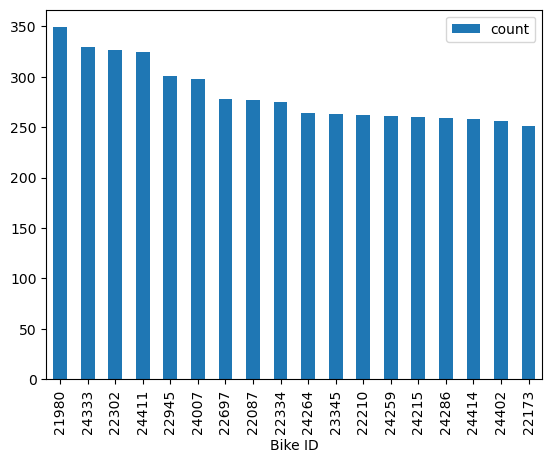

In [57]:
bike_count.plot.bar(x = 'Bike ID', y = 'count')

In the following cell, I use `.loc` to filter the dataframe to only include rows with 'One Way' values for the 'trip_route_category' column.

In [47]:
df.loc[df['trip_route_category'] == 'One Way']

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,212454072,42,10/1/2022 0:01,10/1/2022 0:43,4304,34.062580,-118.290092,4405,34.051899,-118.293678,17722,30,One Way,Monthly Pass,electric
2,212453666,14,10/1/2022 0:07,10/1/2022 0:21,4266,34.026291,-118.277687,4245,34.024040,-118.283409,14853,1,One Way,Walk-up,standard
4,212453562,11,10/1/2022 0:08,10/1/2022 0:19,4606,34.168629,-118.377068,4597,34.165218,-118.355148,15816,1,One Way,Walk-up,standard
6,212453663,10,10/1/2022 0:14,10/1/2022 0:24,4487,34.062111,-118.446922,4514,34.046551,-118.451439,19996,30,One Way,Monthly Pass,standard
7,212453662,8,10/1/2022 0:15,10/1/2022 0:23,4444,34.061619,-118.305573,4405,34.051899,-118.293678,24215,365,One Way,Annual Pass,electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80367,231772762,15,12/31/2022 22:14,12/31/2022 22:29,3008,34.046612,-118.262733,3063,34.048038,-118.247490,22873,1,One Way,Walk-up,electric
80368,231773363,27,12/31/2022 22:32,12/31/2022 22:59,3035,34.048401,-118.260948,3046,34.052872,-118.296799,24375,1,One Way,Walk-up,electric
80369,231773162,10,12/31/2022 22:38,12/31/2022 22:48,4587,34.060791,-118.309067,4410,34.063351,-118.243248,12280,30,One Way,Monthly Pass,standard
80370,231780463,4,12/31/2022 23:52,12/31/2022 23:56,4491,34.047440,-118.247940,4475,34.045181,-118.243248,19996,30,One Way,Monthly Pass,standard
